# Point Processing
## Contrast Stretching (Min-Max Normalization)

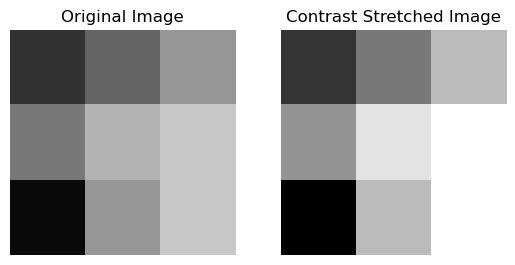

Original Image:
 [[ 50 100 150]
 [120 180 200]
 [ 10 150 200]]
Contrast Stretched Image:
 [[ 53 120 187]
 [147 228 255]
 [  0 187 255]]


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = np.array([
    [50, 100, 150], 
    [120, 180, 200],
    [10, 150, 200]], dtype=np.uint8)

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# --- Contrast Stretching Implementation ---
r_min = np.min(img)
r_max = np.max(img)

if r_max == r_min:
    contrast_stretched = img.copy()
else:
    # Apply the linear transformation: s = ((r - r_min) / (r_max - r_min)) * (L - 1)
    # Use float for calculation and then convert back to uint8
    contrast_stretched = ((img.astype(np.float32) - r_min) / (r_max - r_min)) * 255
    contrast_stretched = np.clip(contrast_stretched, 0, 255).astype(np.uint8)

L = 256 


# contrast_stretched = ((img.astype(np.float32) - r_min) / (r_max - r_min)) * (L - 1)
# contrast_stretched = np.clip(contrast_stretched, 0, L - 1).astype(np.uint8)

# Display the contrast-stretched image
plt.subplot(1, 2, 2)
plt.title('Contrast Stretched Image')
plt.imshow(contrast_stretched, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

print("Original Image:\n", img)
print("Contrast Stretched Image:\n", contrast_stretched)

## Thresholding

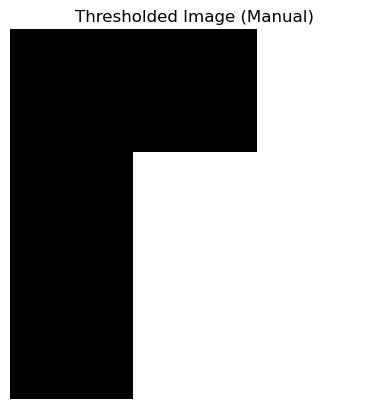

Original Image:
 [[ 50 100 150]
 [120 180 200]
 [ 10 150 200]]
Thresholded Image (Manual):
 [[  0   0 255]
 [  0 255 255]
 [  0 255 255]]


In [34]:
threshold_value = 127
max_value = L - 1

thresholded_manual = np.where(img > threshold_value, max_value, 0).astype(np.uint8)
plt.imshow(thresholded_manual, cmap='gray', vmin=0, vmax=255)
plt.title('Thresholded Image (Manual)')
plt.axis('off')
plt.show()
print("Original Image:\n", img)
print("Thresholded Image (Manual):\n", thresholded_manual)


# Linear Transformation
## Negative Transformation

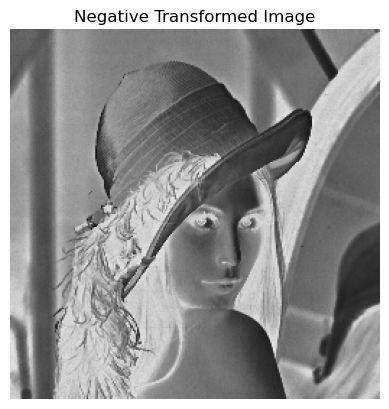

In [35]:
img = cv2.imread('Images/lenna.png', cv2.IMREAD_GRAYSCALE)
inverted_img = 255 - img
plt.imshow(inverted_img, cmap='gray', vmin=0, vmax=255)
plt.title('Negative Transformed Image')
plt.axis('off')
plt.show()


# Logarithmic Transformation
## Log Transformation
The transformation function is $s = c \cdot \log(1 + r)$, where $c$ is a scaling constant.

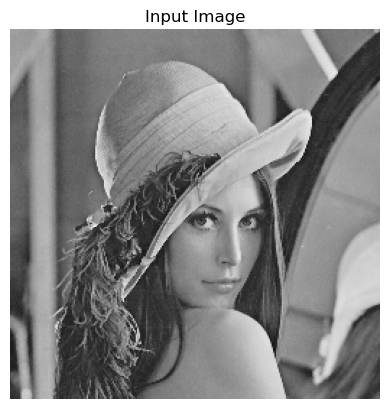

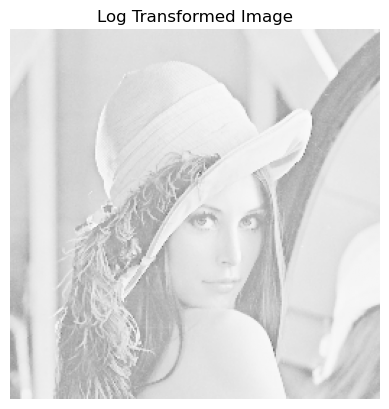

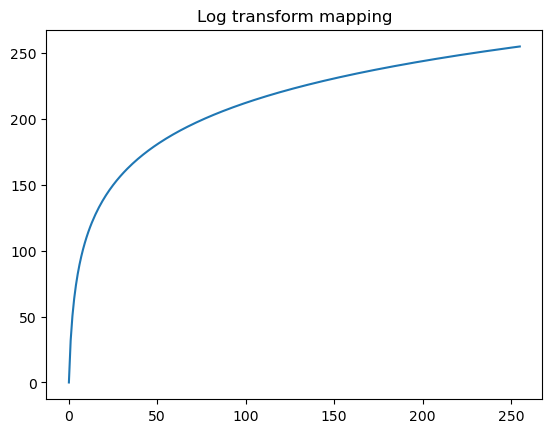

In [36]:
# Convert to float for safe computation
img_float = img.astype(np.float32)
max_val = np.max(img_float)
if max_val > 0:
    c = 255.0 / np.log(1 + max_val) # Compute log transformation constant
    log_transformed = c * np.log(1 + img_float) # Apply log transformation
    log_transformed = np.clip(log_transformed, 0, 255).astype(np.uint8) # # Normalize and convert back to uint8
else:
    log_transformed = img.copy()

"""
plt.hist(img.ravel(), bins=256, range=(0,255)); plt.title('Input histogram'); plt.show()
plt.hist(contrast_stretched.ravel(), bins=256, range=(0,255)); plt.title('After contrast stretching'); plt.show()
"""

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')
plt.show()

plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=255)  
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

r = np.linspace(0,255,256)
s_log = c * np.log(1 + r)
plt.plot(r, s_log); plt.title('Log transform mapping'); plt.show()



## Inverse Log Transformation

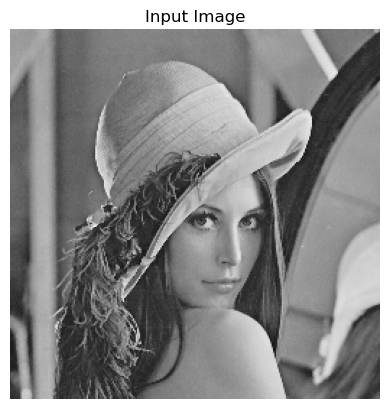

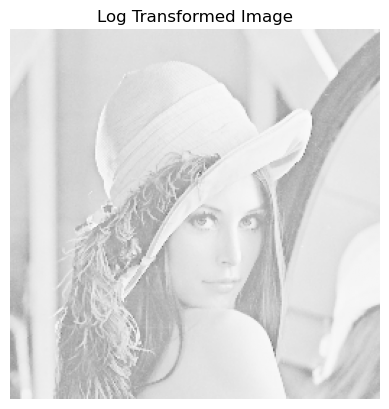

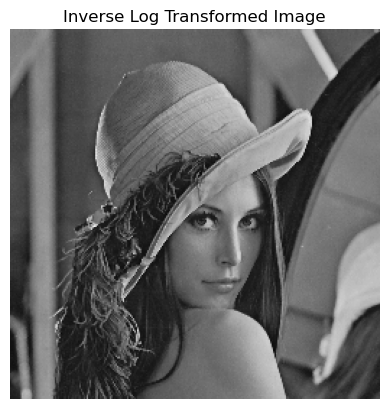

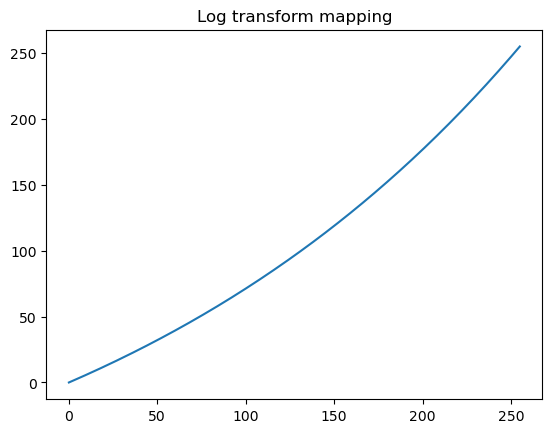

In [37]:
# The Inverse Log Transformation often simply reverses the effect of the Log Transformation.
# For simplicity and a clear demonstration of the *inverse* effect:
# If log_transformed was normalized to [0, 1] then:
# r = exp(s/c) - 1

# Use the log_transformed result from above:
# log_transformed (scaled 0-255) -> 
# 1. Normalize to 0-1 range
# 2. Apply inverse log/exponential: r = exp(s_norm * c_inv) - 1
# 3. Rescale back to 0-255

# --- Inverse Log Transformation Implementation ---
# Reusing 'c' from the log transformation for a direct inverse demonstration
# c = 255 / np.log(1 + np.max(img.astype(np.float32))) 

# Inverse log is often implemented as a power-law with gamma > 1 to compress darks (if log brightens darks)
# A simple, common inverse log structure:
c_inv = 255 / (np.exp(1) - 1)
inverse_log_transformed = c_inv * (np.exp(img_float / 255.0) - 1)
inverse_log_transformed = np.clip(inverse_log_transformed, 0, 255).astype(np.uint8)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')
plt.show()

plt.imshow(log_transformed, cmap='gray', vmin=0, vmax=255)  
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

plt.imshow(inverse_log_transformed, cmap='gray', vmin=0, vmax=255)
plt.title('Inverse Log Transformed Image')
plt.axis('off')
plt.show()

r = np.linspace(0,255,256)
s_log = 255 / (np.exp(1) - 1) * (np.exp(r / 255.0) - 1)
plt.plot(r, s_log); plt.title('Log transform mapping'); plt.show()

# cv2.imshow('Original Image', img)
# cv2.imshow('Inverse Log Transformed Image', inverse_log_transformed)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Power Law or Gamma Correction
The transformation function is $s = c \cdot r^{\gamma}$, where $\gamma$ is the gamma value.

## A. Gamma Correction ($\gamma < 1$, $\gamma = 1$, $\gamma > 1$)$\gamma < 1$: 
   - Brightens the image, expands darker areas (like log).
   - $\gamma = 1$: Identity transformation.
   - $\gamma > 1$: Darkens the image, expands lighter areas.

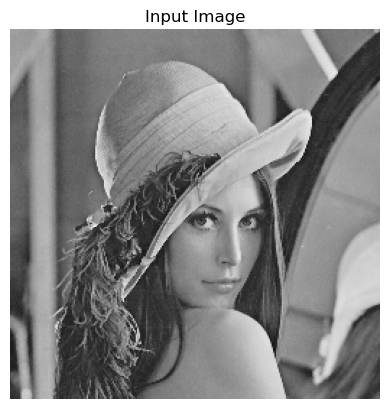

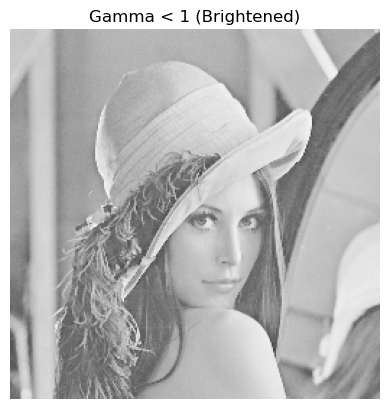

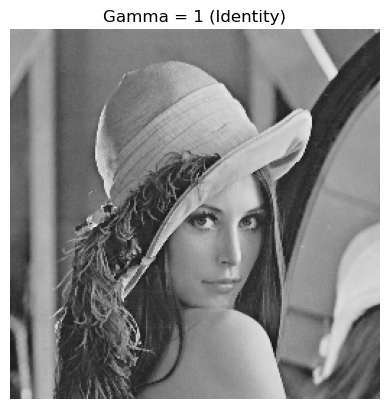

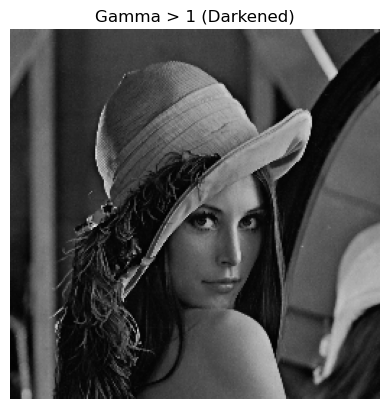

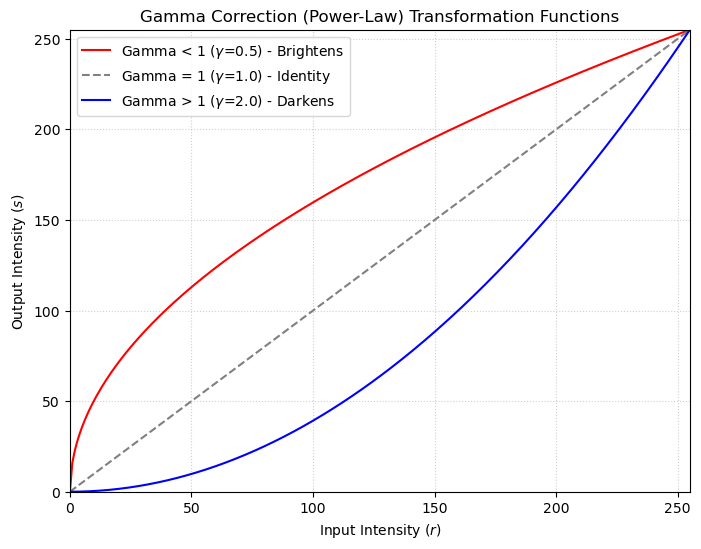

In [38]:
# Convert to float and normalize to [0, 1] for power law calculation
img_normalized = img.astype(np.float32) / 255.0

def gamma_correction(image_normalized, gamma):
    # s = r ^ gamma
    gamma_corrected = np.power(image_normalized, gamma)
    # Scale back to [0, 255] and convert to uint8
    return np.clip(gamma_corrected * 255, 0, 255).astype(np.uint8)

# --- Gamma Correction Implementations ---
gamma_less_than_1 = 0.5 # Brightens
gamma_equal_to_1 = 1.0  # Identity
gamma_greater_than_1 = 2.0 # Darkens

img_gamma_less_1 = gamma_correction(img_normalized.copy(), gamma_less_than_1)
img_gamma_equal_1 = gamma_correction(img_normalized.copy(), gamma_equal_to_1)
img_gamma_greater_1 = gamma_correction(img_normalized.copy(), gamma_greater_than_1)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')
plt.show()

plt.imshow(img_gamma_less_1, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma < 1 (Brightened)')
plt.axis('off')
plt.show()

plt.imshow(img_gamma_equal_1, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma = 1 (Identity)')
plt.axis('off')
plt.show()

plt.imshow(img_gamma_greater_1, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma > 1 (Darkened)')
plt.axis('off')
plt.show()

# cv2.imshow('Original Image', img)
# cv2.imshow('Gamma < 1 (Brightened)', img_gamma_less_1)
# cv2.imshow('Gamma = 1 (Identity)', img_gamma_equal_1)
# cv2.imshow('Gamma > 1 (Darkened)', img_gamma_greater_1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# --- Transformation Function Plot (Added) ---
## Gamma Correction Transformation Plot

# Input intensities r: A range from 0 to 255
r = np.arange(256, dtype=np.float32)

# Calculate output intensities s for each gamma value
# The transformation function is s = 255 * (r/255)^gamma
s_less_1 = 255.0 * np.power(r / 255.0, gamma_less_than_1)
s_equal_1 = 255.0 * np.power(r / 255.0, gamma_equal_to_1)
s_greater_1 = 255.0 * np.power(r / 255.0, gamma_greater_than_1)

plt.figure(figsize=(8, 6))
plt.plot(r, s_less_1, label=f'Gamma < 1 ($\gamma$={gamma_less_than_1}) - Brightens', color='red')
plt.plot(r, s_equal_1, label=f'Gamma = 1 ($\gamma$={gamma_equal_to_1}) - Identity', color='gray', linestyle='--')
plt.plot(r, s_greater_1, label=f'Gamma > 1 ($\gamma$={gamma_greater_than_1}) - Darkens', color='blue')

plt.title('Gamma Correction (Power-Law) Transformation Functions')
plt.xlabel('Input Intensity ($r$)')
plt.ylabel('Output Intensity ($s$)')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Piecewise Linear Transformation
## Piecewise Contrast Stretching (General Form)

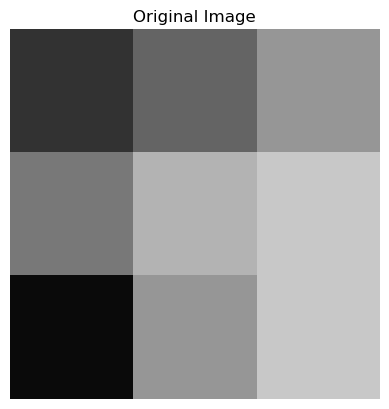

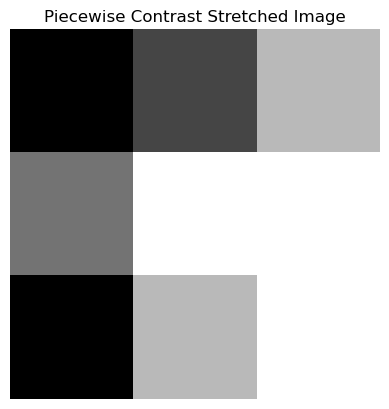

In [39]:
img = np.array([
    [50, 100, 150], 
    [120, 180, 200],
    [10, 150, 200]], dtype=np.uint8)

# --- Piecewise Contrast Stretching Implementation ---
# Define key points (r1, s1) and (r2, s2)
r1, s1 = 70, 0
r2, s2 = 180, 255 

stretched_img = np.zeros(img.shape, dtype=np.uint8)
img_float = img.astype(np.float32)

# Calculate slopes for the three segments
m1 = s1 / r1 if r1 != 0 else 1 
m2 = (s2 - s1) / (r2 - r1) if r2 != r1 else 1 
m3 = (255 - s2) / (255 - r2) if r2 != 255 else 1 

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r = img_float[i, j]
        s = 0
        if 0 <= r <= r1:
            # Segment 1: [0, r1] -> [0, s1]
            s = m1 * r
        elif r1 < r <= r2:
            # Segment 2: [r1, r2] -> [s1, s2]
            s = m2 * (r - r1) + s1
        else: # r2 < r <= 255
            # Segment 3: [r2, 255] -> [s2, 255]
            s = m3 * (r - r2) + s2
        
        stretched_img[i, j] = np.clip(s, 0, 255).astype(np.uint8)


plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.show()
plt.imshow(stretched_img, cmap='gray', vmin=0, vmax=255)
plt.title('Piecewise Contrast Stretched Image')
plt.axis('off')
plt.show()



# cv2.imshow('Original Image', img)
# cv2.imshow('Piecewise Contrast Stretched Image', stretched_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Identity Level Slicing (Gray-Level Slicing)

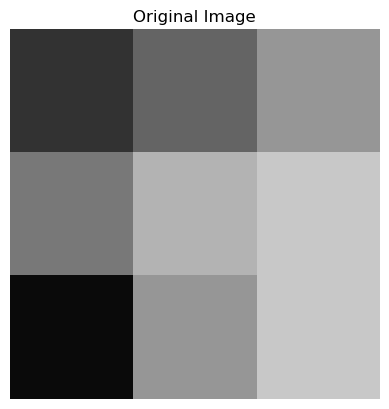

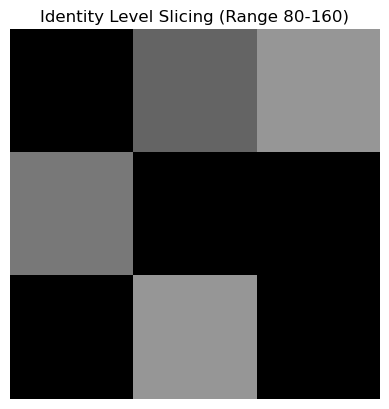

In [40]:
# --- Identity Level Slicing Implementation ---
# Define the range of interest [A, B]
A = 80
B = 160 

# Create an output image initialized to black (0)
slicing_img = np.zeros_like(img)

# Condition: A < pixel <= B 
# Pixels in the range retain their original value (identity)
# Pixels outside are already 0 (black)
slicing_img[(img > A) & (img <= B)] = img[(img > A) & (img <= B)]

# cv2.imshow('Original Image', img)
# cv2.imshow('Identity Level Slicing (Range 80-160)', slicing_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')
plt.show()
plt.imshow(slicing_img, cmap='gray', vmin=0, vmax=255)
plt.title('Identity Level Slicing (Range 80-160)')
plt.axis('off')
plt.show()

## Bit Plane Slicing

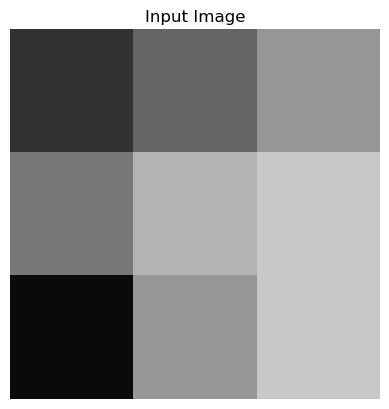

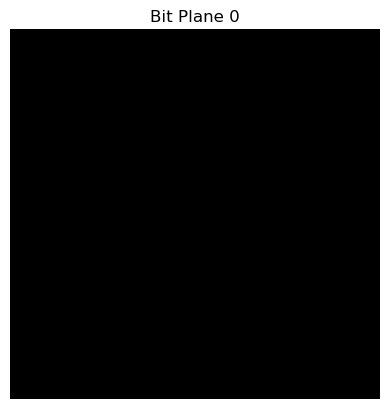

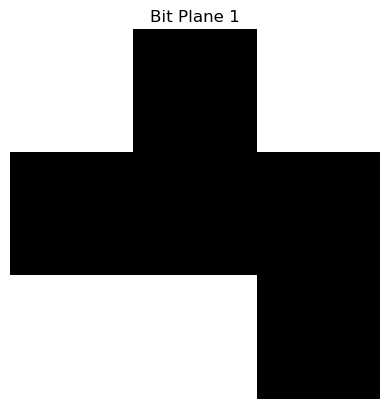

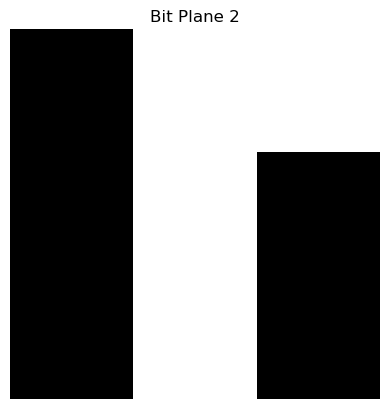

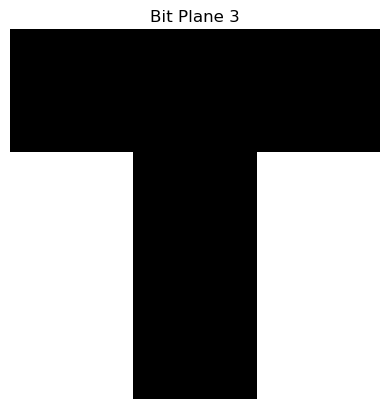

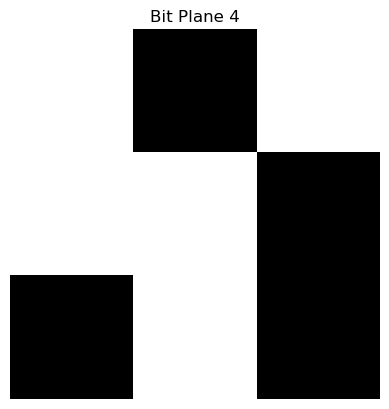

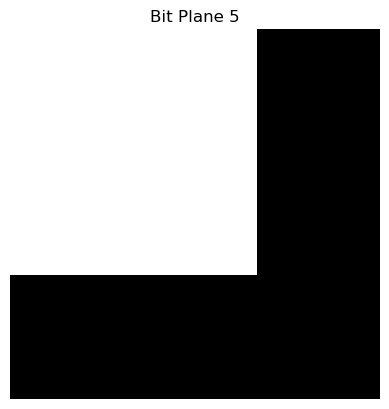

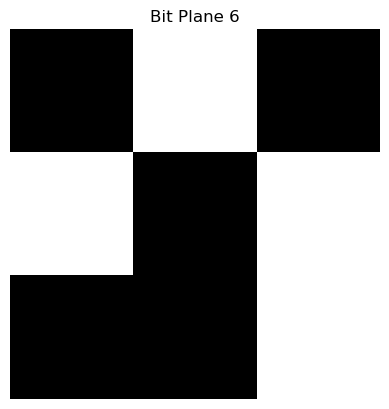

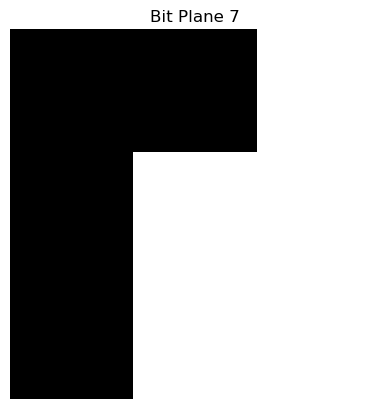

In [41]:
# --- Bit Plane Slicing Implementation ---
num_bits = 8

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')
plt.show()

bit_planes = []

for i in range(num_bits):
    # Create the mask for the i-th bit (2^i)
    # Example: i=0 (LSB) mask is 1 (00000001)
    # Example: i=7 (MSB) mask is 128 (10000000)
    
    # 1. Isolate the i-th bit using bitwise AND:
    bit_plane = np.bitwise_and(img, 2**i)
    
    # 2. Rescale the plane for visualization (to 0 or 255).
    # This bit plane image now has values 0 or 2^i. We set the non-zero values to 255.
    # Note: For simple analysis, keeping values 0 or 2^i is sufficient, 
    # but for visualization, 0/255 is clearer.
    visual_plane = np.where(bit_plane == 0, 0, 255).astype(np.uint8)
    
    bit_planes.append(visual_plane)

    plt.imshow(visual_plane, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
    plt.show()

# To display a specific bit plane (e.g., the MSB - bit plane 7)
msb_plane = bit_planes[7] 

# cv2.imshow('Original Image', img)
# cv2.imshow('MSB (Bit Plane 7)', msb_plane)
# cv2.waitKey(0)
# cv2.destroyAllWindows()